In [1]:
cd C:\Users\Ishita\Documents

C:\Users\Ishita\Documents


In [2]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
df=pd.read_csv('NYC_Restaurants.csv',
               dtype='unicode',
              parse_dates=['INSPECTION DATE','GRADE DATE','RECORD DATE'] )

Populating the interactive namespace from numpy and matplotlib


## Q1) Create a unique name for each restaurant.

Approach : Combined columns DBA, BUILDING, STREET and ZIPCODE with a space between each of them and printed the first 10 values of the new combined column RESTAURANT

In [3]:
#Q1
df['RESTAURANT']=df['DBA']+' '+df['BUILDING']+' '+df['STREET']+' '+df['ZIPCODE'] ## Combine columns with space
df['RESTAURANT'][0:10] #print first 10 values

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

## Q2) How many restaurants are included in the data?

Approach : Used unique to get unique restaurants, and used len to get the number of unique restaurants

In [4]:
#Q2
num_restaurants=len(df['RESTAURANT'].unique()) ##len of the column restaurants with unique counting
print 'The number of restaurants are: ', num_restaurants ##print answer

The number of restaurants are:  10114


## Q3) How many chains are there?

Approach : Created a new data frame with DBA and RESTAURANT with unique rows, and counted the number of times DBA occured (to give the number of restaurants per DBA). We used the mask on this dataframe whereever the count for each DBA was greater than 1. This gave us the chain restaurants. 

In [5]:
#Q3
chains_df=df[['DBA','RESTAURANT']].drop_duplicates()['DBA'].value_counts() #create dataframe with unique DBA and RESTAURANT & do value count for DBA
chains=chains_df[chains_df>1] #Use mask, where value count for DBA >1
print 'The number of chains are:', len(chains) #Print answer

The number of chains are: 368


## Q 4) Plot a bar graph of the top 20 most popular chains.

Approach: Plotted the chains dervied in the previous question  

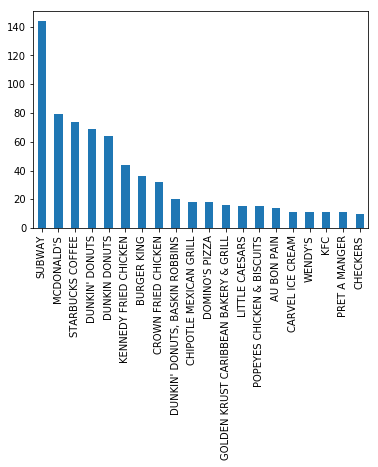

In [6]:
#Q4
chains[:20].plot(kind='bar') #Plot popular chain

## Q5) What fraction of all restaurants are chains?

Approach: Created a mask for DBA in the chain DBA. Using this mask, we found the rows from df to get data corresponding to chain restaurants. Extracted Restaurants from this masked data frame, dropped the duplicates and used len function to get total no of chain restaurants. Used original dataframe to calculate total number of restaurants using drop duplicates and len as used above.

In [7]:
#Q5 
is_chain=df['DBA'].isin(chains.index)==True  #Mask for chain restaurants
chainRest=df[is_chain]['RESTAURANT'].drop_duplicates() #Extracting chain restaurant using mask
totRest=df['RESTAURANT'].drop_duplicates() #Calculating total no of restaurants
frac_chains=float(len(chainRest))/len(totRest) #Getting fraction of chain restaurants 
print 'The fraction of restaurants that are chains are:',frac_chains #Final answer

The fraction of restaurants that are chains are: 0.164722167293


## Q6) Plot the number of non-chain restaurants in each boro.

Approach: Created a mask for DBA not in the chain DBA. Created another mask for the 'Missing' Boro. Used both the masks to get unique BORO and DBA with non chain and non-'Missing' DBA, and created a new dataframe. Used this dataframe and used _valuecounts()_ to get the non-chain restaurants for each Boro, and plotted the graph.  

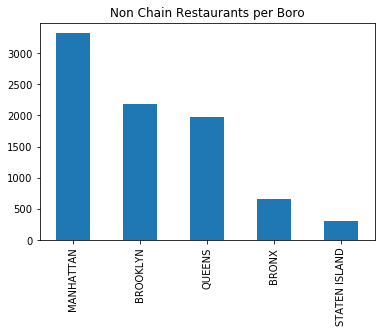

In [9]:
#Q6
non_chains=df['DBA'].isin(chains.index)== False #mask for DBA not in the chain DBA
missing=df['BORO']!='Missing' #ask for the 'Missing' Boro
non_chain_non_missing=df[non_chains & missing][['BORO','DBA']].drop_duplicates() #unique BORO and DBA with non chain and non-'Missing' DBA
non_chain_boro=non_chain_non_missing['BORO'].value_counts() #value counts to get #non chain restaurants for each Boro
non_chain_boro.plot(kind='bar',title = "Non Chain Restaurants per Boro") #Graph plotting

## Q7) Plot the fraction of non-chain restaurants in each boro

Approach: Calculated the number of restaurants by each Boro by using the missing mask to remove 'Missing' Boro, extracted unique Boro and Restaurant pair, and used _valuecounts()_ on Boro to get number of restaurants by each boro.
Used the variable created in the previous question to get no. of non chain restaurants for each boro. 
Divided the non chain restaurants by total restaurants for each boro to get the fraction and plotted the graph.

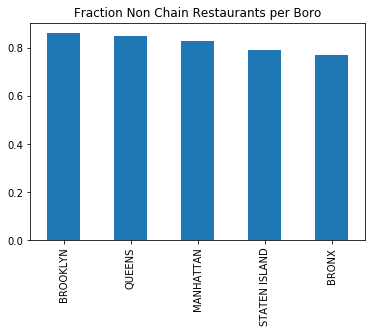

In [10]:
#Q7

num_rest_by_boro=df[missing][['BORO','RESTAURANT']].drop_duplicates()['BORO'].value_counts() #number of restaurants by each Boro, remove 'Missing' Boro
frac_non_chain_boro=non_chain_boro/num_rest_by_boro #Non chain restaurants by total restaurants for each boro
frac_non_chain_boro.sort_values(ascending=False).plot(kind='bar',title = "Fraction Non Chain Restaurants per Boro") #Plot 
#No, the boro with most independent restaurants is not the one with highest ratio of independent restaurants

## Q8) Plot the popularity of cuisines

Approach: Created 'cuisine' dataframe with unquie restaurant and cuisine description for each row.
Did _valuecounts()_ for each cuisines, and plotted the top 20 cuisines

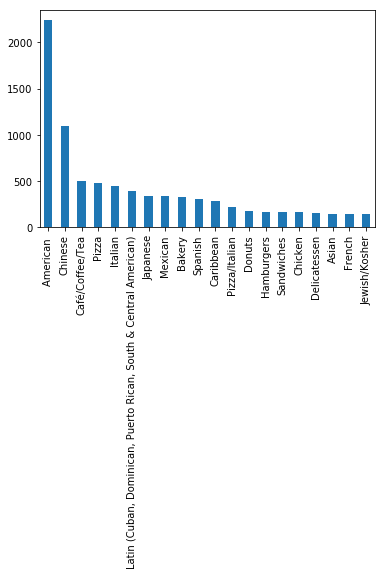

In [86]:
cuisine=df[['RESTAURANT','CUISINE DESCRIPTION']].drop_duplicates() # unqiue restaurant and cuisine description combination for each row

cuisine['CUISINE DESCRIPTION'].value_counts()[0:20].plot(kind='bar') # plot top 20 cuisines

## Q9) Plot the cuisines among restaurants which never got cited for violations.

Approach: Created a mask for restaurants which got cited for violations and used it to get restaurants which got cited for violations.
Created a new dataframe with unique restaurants and cuisine description combination.
Used _isin==False_ to get the restaurants which were not cited for violations. 
Did _valuecounts()_ to get the top 20 cuisines among restaurants which never got cited for violations

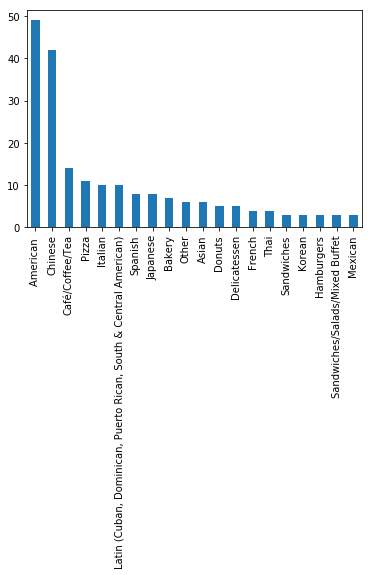

In [47]:
#Q9
ViolationMask=df['VIOLATION CODE'].notnull() #mask for restaurants which got cited for violations
ViolationCuisine=df[ViolationMask]['RESTAURANT'].drop_duplicates() #Restaurants cited for violations
restCuisine=df[['RESTAURANT','CUISINE DESCRIPTION']].drop_duplicates()  #dataframe with unique restaurants and cuisine description
nonViolatedRest=restCuisine['RESTAURANT'].isin(ViolationCuisine.values)==False #restaurants not cited for violations
restCuisine[nonViolatedRest]['CUISINE DESCRIPTION'].value_counts()[0:20].plot(kind='bar') # plotting top 20 cuisines 

## Q10) What cuisines tend to be the "cleanest"?

Approach: Dropped the duplicate restaurants, found the number of restaurants per cuisine, and filtered out all cuisines with less than 20 restaurants. Taking that filtered list of restaurants, went back to the original data set and filtered all violations that did not correspond to the restaurants belonging in the cuisines with over 20 restaurants. Next, found the number of number of restaurants without violations by cuisine and found the total violations by cuisine. Dividing these two series and plotting the results created the bar chart.

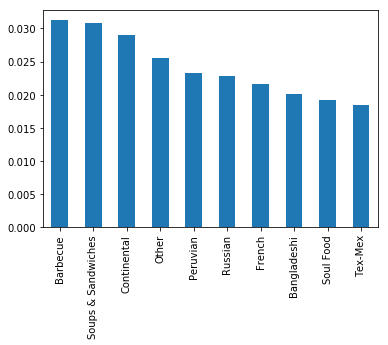

In [14]:
#Q10
topCuisine=df[['RESTAURANT','CUISINE DESCRIPTION']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()
topCuisine=topCuisine[topCuisine>=20]
topCuisineRows=df[df['CUISINE DESCRIPTION'].isin(topCuisine.index)]
violationRows=topCuisineRows[topCuisineRows['VIOLATION CODE'].isnull()]
(violationRows['CUISINE DESCRIPTION'].value_counts()/topCuisineRows['CUISINE DESCRIPTION'].value_counts()).sort_values(ascending=False)[:10].plot(kind='bar')



## Q11 What are the most frequent violations per Boro?

Approach: Created a crosstab with the columns of the violation descriptions and the rows containing the Boro names. Then, performed a transpose (to flip the rows and columns) and _idxmax()_ to get the highest violation.

In [49]:
#Q11
violation_crosstab=pd.crosstab(df['BORO'],df['VIOLATION DESCRIPTION']) #Create crosstab with Boro x Violation Description with counts
violation_crosstab.T.idxmax() #transpose and fix most frequent

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
Missing          Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

## Q12) What are the most common violations per Boro after normalizing for relative 

Approach: Using previous crosstab, _apply()_ a lamda expression to find the normalized frequency. Once again, transposed and found _idxmax()_.

In [80]:
#Q12
violation_crosstab2=violation_crosstab.apply(lambda c:c/c.sum(),axis=0) ##apply normalization formula to previous cross tab
violation_crosstab2.T.idxmax() #wrangle data to find highest calculated amount

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
Missing          ''''Wash hands sign not posted at hand wash f...
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

## Q13) How many phone areas correspond to a single zipcode?

Approach: Extracted the  Area Code from the phone number, using _getAreaCode()_. Created a mask that filtered for the Area Codes that only contained a single Area Code. Finally, Returned the length of the filtered out series that contained the zipcodes.

In [14]:
#Q13
def getAreaCode(st):
    return st[0:3] #extracts area code from phone number
df['AREACODE'] = df['PHONE'].map(getAreaCode) #creates AreaC Code column

#creates a mask for phone areas with a single zip code
mask = df[['AREACODE','ZIPCODE']].drop_duplicates()['ZIPCODE'].groupby(df['AREACODE']).count() == 1

#applys mask and gets number of single area code zip codes
singleAreaCode = len(df['ZIPCODE'].groupby(df['AREACODE']).count()[mask])

print singleAreaCode, 'phone area codes correspond to a single zipcode' #This includes '0' area code( where phone number was 0)


34 phone area codes correspond to a single zipcode


## Q14) Find common misspellings of street names

Approach: Used map to find the last word (_findLastWord()_) and the street base (_findBase()_) of the streets in the dataset.

Concatenated the base and zipcode, dropped the duplicate values, and merged the new table on to itself. Applied a mask to determine which street types were misspelled. After applying a crosstab to determine frequencies for potential spellings of the base, we used _idxmax()_ to find the correct spelling.

In [17]:
def findLastWord(st):
    return st.split(" ")[-1] #finds the Street Type of an input
def findBase(st):
    l = st.split(" ")
    while "" in l:
        l.remove("")
    l = l[0:len(l)-1]
    st = ""
    while len(l) != 0:
        st += str(l.pop()) + " "
    return st #find the base of the street 
df['STREET TYPE'] = df['STREET'].map(findLastWord)
df['STREET BASE'] = df['STREET'].map(findBase)


#concatenates street base and zip code into a single value
df['STREET BASE & ZIP'] = df['STREET BASE'] + " " + df['ZIPCODE']


#creates a new data frame with listed columns
newTbl = df[['STREET TYPE','STREET BASE','STREET BASE & ZIP']]
#removes duplicates from new data frame
newTbl = newTbl.drop_duplicates()


#merge newTbl on it's self
newTbl = newTbl.merge(newTbl, left_on = 'STREET BASE & ZIP'
                      ,right_on = 'STREET BASE & ZIP',
                      suffixes = ['_left','_right'])
#creates new dataframe with values in newTbl where Street Type_left did not equal Street Type _right
unequal = newTbl[newTbl['STREET TYPE_left'] != newTbl['STREET TYPE_right']]


#create crosstab to see frequencies
ct = pd.crosstab(unequal['STREET TYPE_left'],unequal['STREET TYPE_right'])

#drop initial empty row (this row contained "" as a value)
ct = ct[1:]

#instantiate given list
IncorrectList = ['AVE','ST','RD','PL','BOULEARD','BULEVARD']

#find most likely correct spellings
ct[IncorrectList].idxmax()

STREET TYPE_right
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object